# E6.B - Task

In [141]:
reset -f

In [142]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Define symbolic variables

In [143]:
L, F, x, ct, E, Iz  = sp.symbols('L, F, x, c_t, E, I_z', real = 'True', positive = 'True')
phiL, Bx, By = sp.symbols('varphi_L, B_x, B_y', real = 'True')
Mbz = sp.Function('M_{bz}')
v = sp.Function('v')

In [144]:
Mct = ct*phiL

In [145]:
eq = sp.Eq(0 , -Mbz(x) + By*(L-x) + Bx*v(x) - Mct)

In [146]:
sol = sp.solve(eq,Mbz(x))
Mbz = sol[0]
Mbz

B_x*v(x) + B_y*L - B_y*x - c_t*varphi_L

In [147]:
DefEq = sp.Eq(sp.Derivative(v(x),x,x), Mbz/(E*Iz)) 
display(DefEq)

Eq(Derivative(v(x), (x, 2)), (B_x*v(x) + B_y*L - B_y*x - c_t*varphi_L)/(E*I_z))

As we can see $B_x=F$ but $B_y$ remains unknown.

In [148]:
DefEq = DefEq.subs(Bx,-F)
display(DefEq)

Eq(Derivative(v(x), (x, 2)), (B_y*L - B_y*x - F*v(x) - c_t*varphi_L)/(E*I_z))

classifying the equation:
* ordinary 
* linear
* second orden
* inhomogeneous
* constant coefficients

we need an ODE solver-> sp.dsolve()

In [149]:
sol = sp.dsolve(DefEq)

In [150]:
v = sol.rhs
dvdx = sp.diff(v,x)
display(v)

B_y*L/F - B_y*x/F + C1*sin(sqrt(F)*x/(sqrt(E)*sqrt(I_z))) + C2*cos(sqrt(F)*x/(sqrt(E)*sqrt(I_z))) - c_t*varphi_L/F

In [151]:
BC1 = sp.Eq(0, v.subs(x,0))
BC2 = sp.Eq(0, dvdx.subs(x,0))
BC3 = sp.Eq(0, v.subs(x,L))
BC4 = sp.Eq(0,phiL + dvdx.subs(x,L))

display(BC1)
display(BC2)
display(BC3)
display(BC4)

Eq(0, B_y*L/F + C2 - c_t*varphi_L/F)

Eq(0, -B_y/F + C1*sqrt(F)/(sqrt(E)*sqrt(I_z)))

Eq(0, C1*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z))) + C2*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z))) - c_t*varphi_L/F)

Eq(0, -B_y/F + C1*sqrt(F)*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))/(sqrt(E)*sqrt(I_z)) - C2*sqrt(F)*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))/(sqrt(E)*sqrt(I_z)) + varphi_L)

In [152]:
CoeffMat = sp.Matrix([[BC1.rhs.coeff('C1'), BC1.rhs.coeff('C2'), BC1.rhs.coeff(By), BC1.rhs.coeff(phiL)],
                      [BC2.rhs.coeff('C1'), BC2.rhs.coeff('C2'), BC2.rhs.coeff(By), BC2.rhs.coeff(phiL)],
                      [BC3.rhs.coeff('C1'), BC3.rhs.coeff('C2'), BC3.rhs.coeff(By), BC3.rhs.coeff(phiL)],
                      [BC4.rhs.coeff('C1'), BC4.rhs.coeff('C2'), BC4.rhs.coeff(By), BC4.rhs.coeff(phiL)]])
CoeffMat

Matrix([
[                                                             0,                                                               1,  L/F, -c_t/F],
[                                   sqrt(F)/(sqrt(E)*sqrt(I_z)),                                                               0, -1/F,      0],
[                            sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z))),                              cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z))),    0, -c_t/F],
[sqrt(F)*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))/(sqrt(E)*sqrt(I_z)), -sqrt(F)*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))/(sqrt(E)*sqrt(I_z)), -1/F,      1]])

In [153]:
fun = CoeffMat.det()
fun = fun.subs([(E, 210000), (Iz,  sp.pi/64 * 1**4), (L, 100)])
fun = sp.lambdify((F, ct), fun, 'numpy')

In [154]:
f_vec = np.linspace(0.001,50,10000)

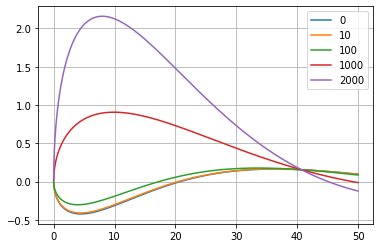

In [155]:
plt.plot(f_vec,fun(f_vec, 0))
plt.plot(f_vec,fun(f_vec, 10))
plt.plot(f_vec,fun(f_vec, 100))
plt.plot(f_vec,fun(f_vec, 1000))
plt.plot(f_vec,fun(f_vec, 2000))
plt.grid()
plt.legend(['0', '10', '100', '1000', '2000'])

In [168]:
from scipy.optimize import fsolve

In [174]:
sol = fsolve(lambda F: fun(F,10),18)
sol

array([20.498791])

## Check Euler Case 4

* here $c_t \rightarrow \infty$
* if $c_t$ gets very large, the solution convregces to the soution of the 4$^{th}$ Euler Case

In [3]:
(4*sp.pi**2*210000*sp.pi/64*1**4/(100**2)).evalf()

NameError: name 'sp' is not defined